In [1]:
# BIBLIOTECAS
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# DECLARA SIMBOLOS
x, y, C1, C2, C3, C4, E, I, P, L = symbols('x y C1 C2 C3 C4 E I P L')

# RAYLEIGH-RITZ
y = C1 + C2*x + C3*x**2 + C4*x**3

# DERIVADAS DO POLINÔMIO
ddy  = y.diff(x,x)

# CONDIÇÕES DE CONTORNO
C1_ = solve(y.subs(x,0), C1)[0]
C2_ = 0
y = y.subs([(C1,C1_), (C2,C2_)])
ddy = ddy.subs([(C1,C1_), (C2,C2_)])

# ENERGIA
en = integrate(1/2*(E*I*ddy**2), (x, 0, L)) - P*y.subs(x ,L)

# SISTEMA
sol = solve((en.diff(C3), en.diff(C4)), C3, C4)
C3_ = sol[C3]
C4_ = sol[C4]

# EQUAÇÃO DA LINHA ELASTICA FINAL
y1 = y.subs([(C3,C3_), (C4,C4_)]).simplify()

# DECLARA SIMBOLOS
x, y, C1, C2, C3, C4, E, I, P, L = symbols('x y C1 C2 C3 C4 E I P L')

# GALERKIN
y = C1 + C2*x + C3*x**2 + C4*x**3

# DERIVADAS DO POLINÔMIO
ddy  = y.diff(x,x)

# CONDIÇÕES DE CONTORNO
C1_ = solve(y.subs(x,0), C1)[0]
C2_ = 0

# RESÍDUO
R    = E*I*ddy - P*(L - x)
phi1 = y.diff(C3) 
phi2 = y.diff(C4)

# SISTEMA DE EQUAÇÕES
I1 = integrate(R*phi1, (x, 0, 1))
I2 = integrate(R*phi2, (x, 0, 1))
system = [I1, I2]
var = [C3, C4] 
sol = solve(system, var)
C3_ = sol[C3]
C4_ = sol[C4]

# EQUAÇÃO DA LINHA ELASTICA FINAL
y2 = y.subs([(C1,C1_), (C2,C2_),(C3,C3_), (C4,C4_)]).simplify()

# DECLARA SIMBOLOS
x, y, C1, C2, C3, C4, E, I, P, L = symbols('x y C1 C2 C3 C4 E I P L')

# COLOCAÇÃO POR PONTOS
y = C1 + C2*x + C3*x**2 + C4*x**3

# DERIVADAS DO POLINÔMIO
ddy  = y.diff(x,x)

# CONDIÇÕES DE CONTORNO
C1_ = solve(y.subs(x,0), C1)[0]
C2_ = 0

# RESÍDUO
R    = E*I*ddy - P*(L - x)

# SISTEMA DE EQUAÇÕES
R1 = R.subs(x, 1/5)
R2 = R.subs(x, 4/5)
system = [R1, R2]
var = [C3, C4]
sol = solve(system, var)
C3_ = sol[C3]
C4_ = sol[C4]

# EQUAÇÃO DA LINHA ELASTICA FINAL
y3 = y.subs([(C1,C1_), (C2,C2_),(C3,C3_), (C4,C4_)]).simplify()

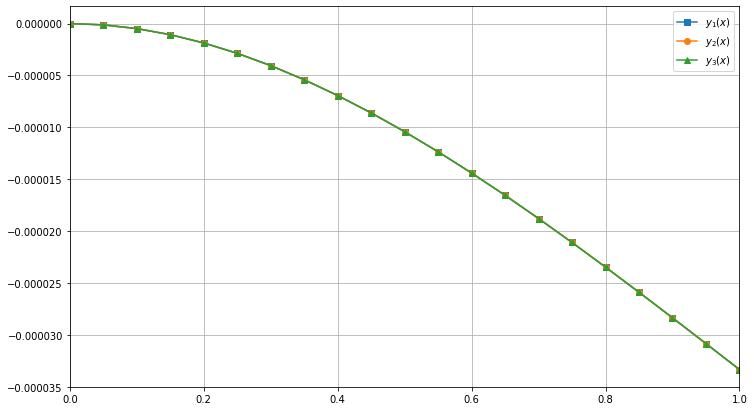

In [6]:
fig, ax = plt.subplots(figsize = (12, 7))

x_range = np.arange(0.0, 1.01, 0.05)
x_1 = list()
y_1 = list()
y_2 = list()
y_3 = list()

for i in x_range:
    value1 = y1.subs([(x, i), (E,5e3), (L,1), (I,200), (P,-100)])
    value2 = y2.subs([(x, i), (E,5e3), (L,1), (I,200), (P,-100)])
    value3 = y3.subs([(x, i), (E,5e3), (L,1), (I,200), (P,-100)])
    x_1.append(i)
    y_1.append(value1)
    y_2.append(value2)
    y_3.append(value3)

plt.xlim([0, 1])
plt.plot(x_1, y_1,'-s')
plt.plot(x_1, y_2,'-o')
plt.plot(x_1, y_3,'-^')
plt.legend(["$y_1(x)$", "$y_2(x)$", "$y_3(x)$"])
plt.grid()